In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/cmap.precip.mon.mean.1979_2018.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 480)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/13)
    CDI:            Climate Data Interface version 1.9.5 (http://mpimet.mpg.d...
    history:        Mon Oct 07 17:40:35 2019: cdo seldate,1979-01-01,2018-12-...
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    ...             ...
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    version:        V1909
    data_modified:  2019-09-12
    CDO:            Climate Data Operators version 1.9.5 (http://mpimet.mpg.d...

In [4]:
precip

NameError: name 'precip' is not defined

In [5]:
ds.precip

<xarray.DataArray 'precip' (time: 480, lat: 72, lon: 144)>
[4976640 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Merged Analysis of Precipitation Standard
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.   63.81]

In [6]:
precip=ds.precip
precip

<xarray.DataArray 'precip' (time: 480, lat: 72, lon: 144)>
[4976640 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Merged Analysis of Precipitation Standard
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.   63.81]

(array([4.232029e+06, 3.238710e+05, 6.617200e+04, 9.221000e+03,
        1.065000e+03, 1.770000e+02, 3.100000e+01, 6.000000e+00,
        1.000000e+00, 2.000000e+00]),
 array([ 0.      ,  5.908   , 11.816   , 17.724   , 23.632   , 29.54    ,
        35.448   , 41.356003, 47.264   , 53.172   , 59.08    ],
       dtype=float32),
 <BarContainer object of 10 artists>)

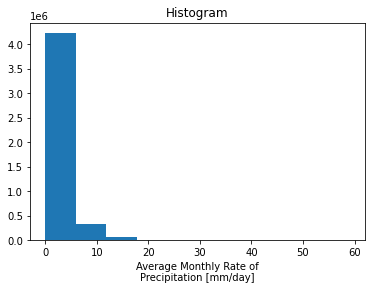

In [7]:
precip.plot()

In [8]:
precip.groupby('time.month')

DataArrayGroupBy, grouped over 'month' 
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [9]:
precip.groupby()

TypeError: groupby() missing 1 required positional argument: 'group'

In [10]:
precip.groupby('time')

DataArrayGroupBy, grouped over 'time' 
480 groups with labels 1979-01-01, ..., 2018-12-01.

In [11]:
precip.groupby('time.season')

DataArrayGroupBy, grouped over 'season' 
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [12]:
precip.groupby('time.year')

DataArrayGroupBy, grouped over 'year' 
40 groups with labels 1979, 1980, 1981, ..., 2017, 2018.

In [13]:
precip.groupby('time.year').plot()

AttributeError: 'DataArrayGroupBy' object has no attribute 'plot'

(array([3.09954e+05, 6.04700e+04, 1.57540e+04, 4.25500e+03, 1.98000e+02,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([ 0.      ,  3.228   ,  6.456   ,  9.684   , 12.912   , 16.14    ,
        19.368   , 22.595999, 25.824   , 29.051998, 32.28    ],
       dtype=float32),
 <BarContainer object of 10 artists>)

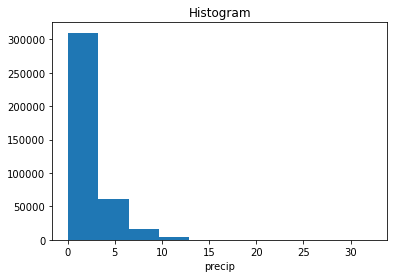

In [14]:
precip.groupby('time.year').mean().plot()

In [15]:
precip.groupby('time').mean().plot()

ValueError: cannot reduce over dimensions ['time']. expected either '...' to reduce over all dimensions or one or more of ('lat', 'lon').

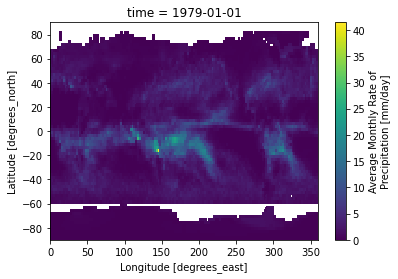

In [16]:
precip.sel(time='1979-01').plot()

(array([9.6926e+04, 1.1860e+04, 3.5640e+03, 1.4200e+03, 3.9100e+02,
        1.0100e+02, 1.1000e+01, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.      ,  4.145   ,  8.29    , 12.435   , 16.58    , 20.725   ,
        24.87    , 29.015001, 33.16    , 37.305   , 41.45    ],
       dtype=float32),
 <BarContainer object of 10 artists>)

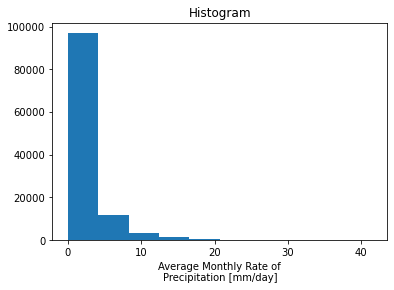

In [17]:
precip.sel(time='1979').plot()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1.6704333, 1.7704333, 1.8704333, 1.9704332, 2.0704334, 2.1704333,
        2.2704332, 2.3704333, 2.4704332, 2.5704334, 2.6704333],
       dtype=float32),
 <BarContainer object of 10 artists>)

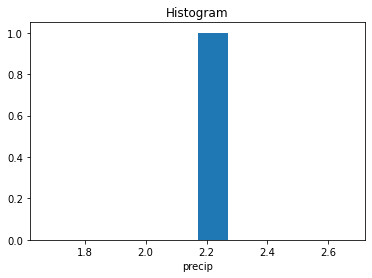

In [18]:
precip.sel(time='1979').mean().plot()

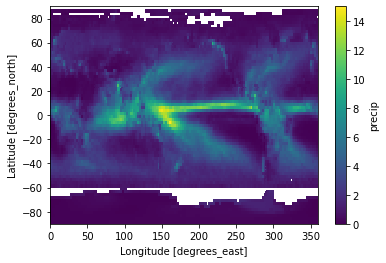

In [19]:
precip.sel(time='1979').mean(dim='time').plot()

In [20]:
precip.sel(time='6').plot()

KeyError: '6'

In [21]:
precip.sel(time='DJF').plot()

KeyError: 'DJF'

In [22]:
precip.sel(time.season='DJF').plot()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-22-3107ea28e9ec>, line 1)

In [23]:
precip.sel(time=='DJF').plot()

NameError: name 'time' is not defined

In [24]:
precip.sel(time.season=='DJF').plot()

NameError: name 'time' is not defined

In [25]:
precip.groupby(time.season)

NameError: name 'time' is not defined

In [26]:
precip.groupby('time.season')

DataArrayGroupBy, grouped over 'season' 
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [27]:
precip.groupby('time.season').plot()

AttributeError: 'DataArrayGroupBy' object has no attribute 'plot'

(array([2.6339e+04, 7.9400e+03, 2.8390e+03, 1.3270e+03, 9.2300e+02,
        3.3000e+02, 9.7000e+01, 2.1000e+01, 9.0000e+00, 4.0000e+00]),
 array([ 0.       ,  2.0622084,  4.124417 ,  6.186625 ,  8.248834 ,
        10.311042 , 12.37325  , 14.435458 , 16.497667 , 18.559875 ,
        20.622084 ], dtype=float32),
 <BarContainer object of 10 artists>)

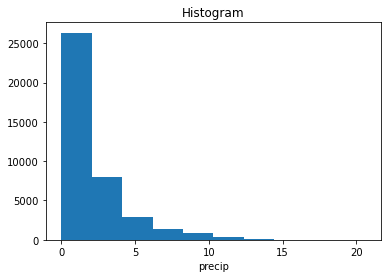

In [28]:
precip.groupby('time.season').mean(dim='time').plot()

(array([8.3517e+04, 2.0927e+04, 7.3120e+03, 3.7970e+03, 2.0990e+03,
        6.7200e+02, 1.8100e+02, 5.0000e+01, 1.2000e+01, 2.0000e+00]),
 array([ 0.       ,  2.3151255,  4.630251 ,  6.9453764,  9.260502 ,
        11.575627 , 13.890753 , 16.20588  , 18.521004 , 20.836128 ,
        23.151255 ], dtype=float32),
 <BarContainer object of 10 artists>)

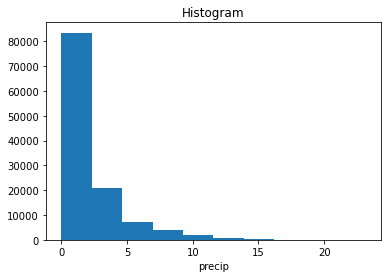

In [29]:
precip.groupby('time.month').mean(dim='time').plot()

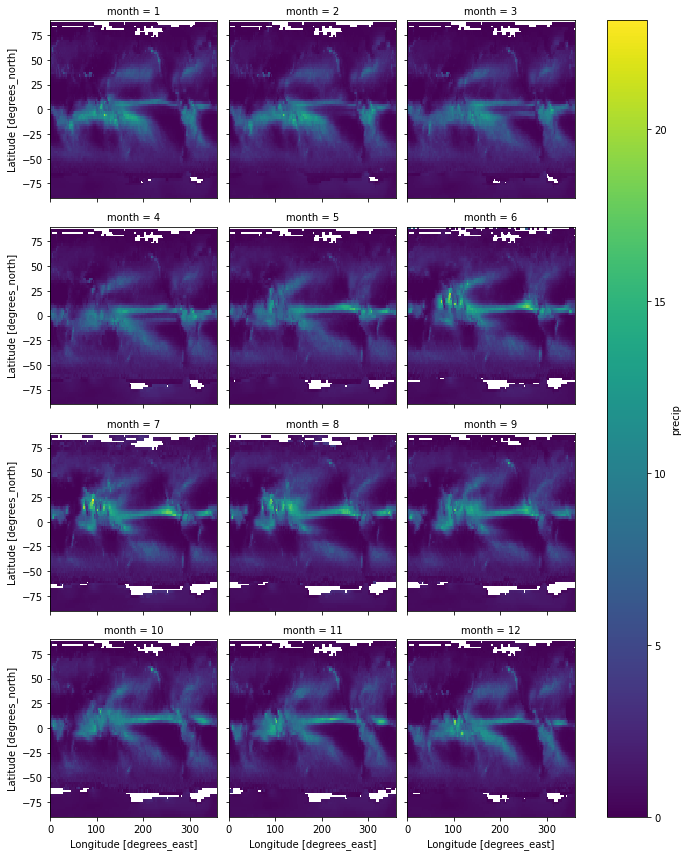

In [30]:
precip.groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3)

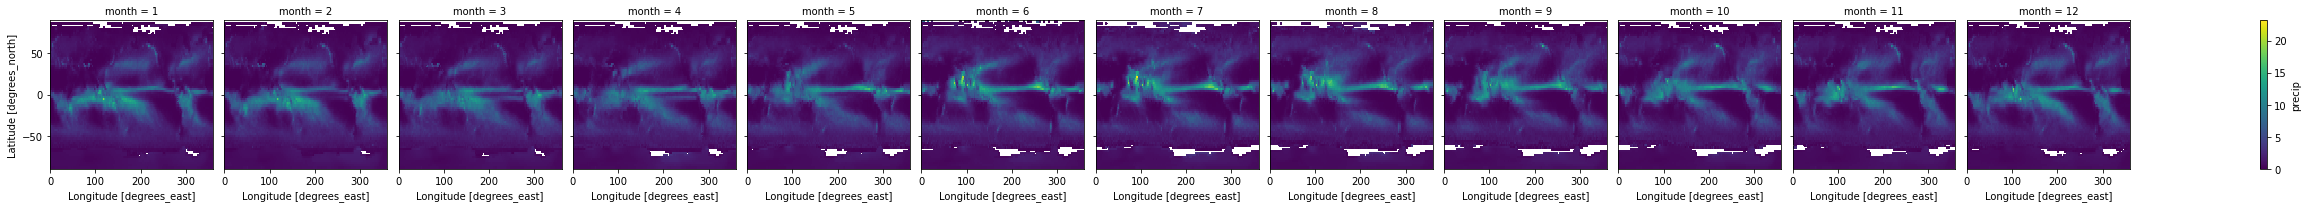

In [31]:
precip.groupby('time.month').mean(dim='time').plot(col='month')

(array([8.3517e+04, 2.0927e+04, 7.3120e+03, 3.7970e+03, 2.0990e+03,
        6.7200e+02, 1.8100e+02, 5.0000e+01, 1.2000e+01, 2.0000e+00]),
 array([ 0.       ,  2.3151255,  4.630251 ,  6.9453764,  9.260502 ,
        11.575627 , 13.890753 , 16.20588  , 18.521004 , 20.836128 ,
        23.151255 ], dtype=float32),
 <BarContainer object of 10 artists>)

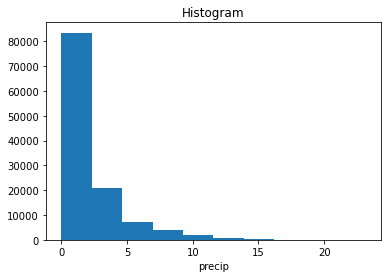

In [32]:
precip.groupby('time.month').mean(dim='time').plot(col_wrap=3)

In [33]:
precip.groupby('time.month')

DataArrayGroupBy, grouped over 'month' 
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [34]:
precip.groupby('time.month').mean()

<xarray.DataArray 'precip' (month: 12, lat: 72, lon: 144)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.10487177, 0.12410258, 0.12615384, ..., 0.2369231 ,
         0.10461537, 0.09358974],
        [0.08794871,        nan,        nan, ..., 0.3317949 ,
         0.26794878, 0.09897435],
        ...,
        [0.62675005, 0.64125   , 0.664     , ..., 0.52700007,
         0.526     , 0.52599996],
        [0.59174997, 0.60875   , 0.65250003, ..., 0.503     ,
         0.50350004, 0.50874996],
        [0.51074994, 0.5205    , 0.52925   , ..., 0.52625   ,
         0.52650005, 0.52599996]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.133     , 0.141     , 0.12699999, ..., 0.12574999,
         0.13399997, 0.13525   ],
        [0.10325   ,        nan,        nan, ..., 0.09874998,
         0.1055    , 0.10074999],
...
        [0.621     , 0.6285    , 0.6327499 , ..., 0.5622499 ,
         0.5527499 , 0.54074997],
        [0.61875   , 0.62174994, 0.65775   , ..., 0.55499995,
         0.55149996, 0.54774994],
        [0.6045    , 0.6195    , 0.62849987, ..., 0.6019999 ,
         0.59924996, 0.592     ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.16125001, 0.187     , 0.28499994, ..., 0.24125001,
         0.19274998, 0.17475002],
        [0.14750001,        nan,        nan, ..., 0.2155    ,
         0.24625003, 0.18625   ],
        ...,
        [0.51625   , 0.52724993, 0.53349996, ..., 0.42150012,
         0.42200002, 0.41800004],
        [0.47774997, 0.49399996, 0.53075   , ..., 0.40475005,
         0.40550002, 0.41      ],
        [0.44049996, 0.45125002, 0.46025   , ..., 0.45575014,
         0.45749998, 0.45925003]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

(array([8.3517e+04, 2.0927e+04, 7.3120e+03, 3.7970e+03, 2.0990e+03,
        6.7200e+02, 1.8100e+02, 5.0000e+01, 1.2000e+01, 2.0000e+00]),
 array([ 0.       ,  2.3151255,  4.630251 ,  6.9453764,  9.260502 ,
        11.575627 , 13.890753 , 16.20588  , 18.521004 , 20.836128 ,
        23.151255 ], dtype=float32),
 <BarContainer object of 10 artists>)

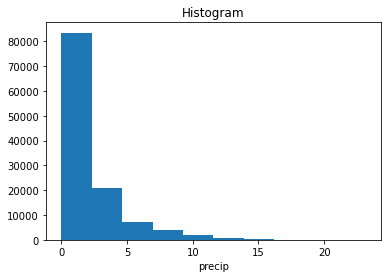

In [35]:
precip.groupby('time.month').mean().plot()

In [36]:
precip.groupby('time.month').plot()

AttributeError: 'DataArrayGroupBy' object has no attribute 'plot'

In [37]:
precip.groupby('time.month').mean(dim='time')

<xarray.DataArray 'precip' (month: 12, lat: 72, lon: 144)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.10487177, 0.12410258, 0.12615384, ..., 0.2369231 ,
         0.10461537, 0.09358974],
        [0.08794871,        nan,        nan, ..., 0.3317949 ,
         0.26794878, 0.09897435],
        ...,
        [0.62675005, 0.64125   , 0.664     , ..., 0.52700007,
         0.526     , 0.52599996],
        [0.59174997, 0.60875   , 0.65250003, ..., 0.503     ,
         0.50350004, 0.50874996],
        [0.51074994, 0.5205    , 0.52925   , ..., 0.52625   ,
         0.52650005, 0.52599996]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.133     , 0.141     , 0.12699999, ..., 0.12574999,
         0.13399997, 0.13525   ],
        [0.10325   ,        nan,        nan, ..., 0.09874998,
         0.1055    , 0.10074999],
...
        [0.621     , 0.6285    , 0.6327499 , ..., 0.5622499 ,
         0.5527499 , 0.54074997],
        [0.61875   , 0.62174994, 0.65775   , ..., 0.55499995,
         0.55149996, 0.54774994],
        [0.6045    , 0.6195    , 0.62849987, ..., 0.6019999 ,
         0.59924996, 0.592     ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.16125001, 0.187     , 0.28499994, ..., 0.24125001,
         0.19274998, 0.17475002],
        [0.14750001,        nan,        nan, ..., 0.2155    ,
         0.24625003, 0.18625   ],
        ...,
        [0.51625   , 0.52724993, 0.53349996, ..., 0.42150012,
         0.42200002, 0.41800004],
        [0.47774997, 0.49399996, 0.53075   , ..., 0.40475005,
         0.40550002, 0.41      ],
        [0.44049996, 0.45125002, 0.46025   , ..., 0.45575014,
         0.45749998, 0.45925003]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

(array([8.3517e+04, 2.0927e+04, 7.3120e+03, 3.7970e+03, 2.0990e+03,
        6.7200e+02, 1.8100e+02, 5.0000e+01, 1.2000e+01, 2.0000e+00]),
 array([ 0.       ,  2.3151255,  4.630251 ,  6.9453764,  9.260502 ,
        11.575627 , 13.890753 , 16.20588  , 18.521004 , 20.836128 ,
        23.151255 ], dtype=float32),
 <BarContainer object of 10 artists>)

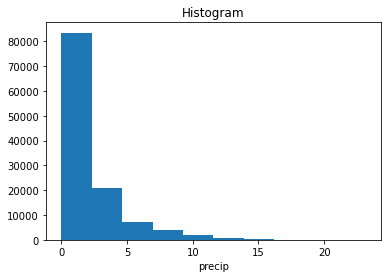

In [38]:
precip.groupby('time.month').mean(dim='time').plot()

In [39]:
precip.groupby(time.season)

NameError: name 'time' is not defined

In [40]:
precip.groupby('time.season')

DataArrayGroupBy, grouped over 'season' 
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [41]:
precip.groupby('time.season').mean()

<xarray.DataArray 'precip' (season: 4, lat: 72, lon: 144)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.1332773 , 0.15092435, 0.17983198, ..., 0.2010084 ,
         0.14411765, 0.13487394],
        [0.11310925,        nan,        nan, ..., 0.21436973,
         0.20605044, 0.12890756],
        ...,
        [0.61050016, 0.6219999 , 0.63458323, ..., 0.5085    ,
         0.50725   , 0.5053333 ],
        [0.5753333 , 0.58933336, 0.6309999 , ..., 0.48183328,
         0.484     , 0.49050006],
        [0.48316658, 0.50066656, 0.5142499 , ..., 0.5065    ,
         0.50841665, 0.51049984]],

       [[0.2       , 6.3       , 8.35      , ..., 0.37      ,
         0.        ,        nan],
        [0.65458333, 0.6463334 , 0.57199997, ..., 0.7384167 ,
         0.68341666, 0.6326666 ],
        [0.64425004,        nan,        nan, ..., 0.78508306,
         0.7407498 , 0.76858336],
...
        [0.55325   , 0.5529167 , 0.5556668 , ..., 0.5079166 ,
         0.50275004, 0.49525008],
        [0.5215833 , 0.52066666, 0.53724986, ..., 0.4796667 ,
         0.47383338, 0.46741667],
        [0.45033348, 0.46350002, 0.47225   , ..., 0.47341672,
         0.46758348, 0.4595001 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.32549998, 0.33074996, 0.49500003, ..., 0.4495    ,
         0.3779166 , 0.32233337],
        [0.29841664,        nan,        nan, ..., 0.36375   ,
         0.47083333, 0.36541668],
        ...,
        [0.5928333 , 0.59524995, 0.59550005, ..., 0.55558336,
         0.5445834 , 0.5318334 ],
        [0.57791656, 0.5752501 , 0.6095    , ..., 0.5311667 ,
         0.5241667 , 0.52041656],
        [0.53649986, 0.55266666, 0.56091654, ..., 0.5384999 ,
         0.5362499 , 0.53341657]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [42]:
precip.groupby('time.season').mean(dim='time')

<xarray.DataArray 'precip' (season: 4, lat: 72, lon: 144)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.1332773 , 0.15092435, 0.17983198, ..., 0.2010084 ,
         0.14411765, 0.13487394],
        [0.11310925,        nan,        nan, ..., 0.21436973,
         0.20605044, 0.12890756],
        ...,
        [0.61050016, 0.6219999 , 0.63458323, ..., 0.5085    ,
         0.50725   , 0.5053333 ],
        [0.5753333 , 0.58933336, 0.6309999 , ..., 0.48183328,
         0.484     , 0.49050006],
        [0.48316658, 0.50066656, 0.5142499 , ..., 0.5065    ,
         0.50841665, 0.51049984]],

       [[0.2       , 6.3       , 8.35      , ..., 0.37      ,
         0.        ,        nan],
        [0.65458333, 0.6463334 , 0.57199997, ..., 0.7384167 ,
         0.68341666, 0.6326666 ],
        [0.64425004,        nan,        nan, ..., 0.78508306,
         0.7407498 , 0.76858336],
...
        [0.55325   , 0.5529167 , 0.5556668 , ..., 0.5079166 ,
         0.50275004, 0.49525008],
        [0.5215833 , 0.52066666, 0.53724986, ..., 0.4796667 ,
         0.47383338, 0.46741667],
        [0.45033348, 0.46350002, 0.47225   , ..., 0.47341672,
         0.46758348, 0.4595001 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.32549998, 0.33074996, 0.49500003, ..., 0.4495    ,
         0.3779166 , 0.32233337],
        [0.29841664,        nan,        nan, ..., 0.36375   ,
         0.47083333, 0.36541668],
        ...,
        [0.5928333 , 0.59524995, 0.59550005, ..., 0.55558336,
         0.5445834 , 0.5318334 ],
        [0.57791656, 0.5752501 , 0.6095    , ..., 0.5311667 ,
         0.5241667 , 0.52041656],
        [0.53649986, 0.55266666, 0.56091654, ..., 0.5384999 ,
         0.5362499 , 0.53341657]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

(array([2.6339e+04, 7.9400e+03, 2.8390e+03, 1.3270e+03, 9.2300e+02,
        3.3000e+02, 9.7000e+01, 2.1000e+01, 9.0000e+00, 4.0000e+00]),
 array([ 0.       ,  2.0622084,  4.124417 ,  6.186625 ,  8.248834 ,
        10.311042 , 12.37325  , 14.435458 , 16.497667 , 18.559875 ,
        20.622084 ], dtype=float32),
 <BarContainer object of 10 artists>)

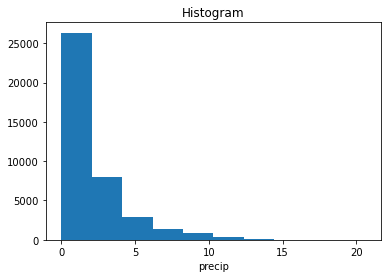

In [43]:
precip.groupby('time.season').mean(dim='time').plot()

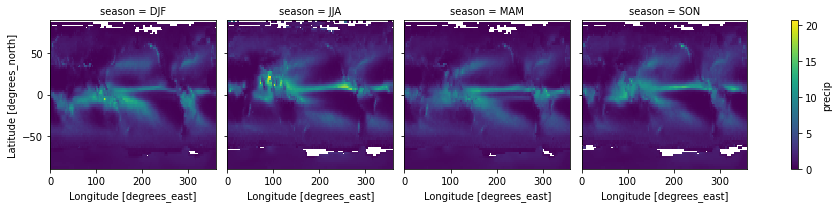

In [44]:
precip.groupby('time.season').mean(dim='time').plot(col='season')

In [45]:
precip.groupby('time.season').sel(season='DJF').plot()

AttributeError: 'DataArrayGroupBy' object has no attribute 'sel'

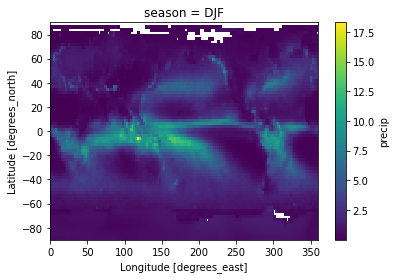

In [46]:
precip.groupby('time.season').mean().sel(season='DJF').plot()

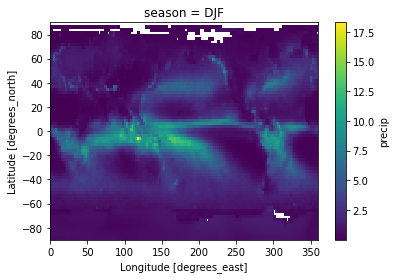

In [47]:
precip.groupby('time.season').mean(dim='time').sel(season='DJF').plot()

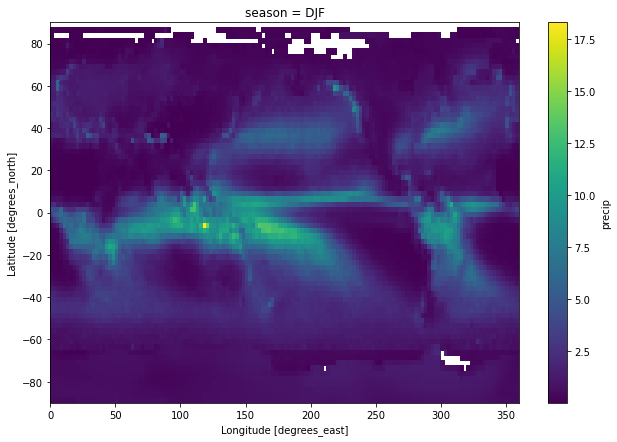

In [48]:
precip.groupby('time.season').mean(dim='time').sel(season='DJF').plot(size=7)

In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ds=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/cmap.precip.mon.mean.1979_2018.nc')
precip=ds.precip

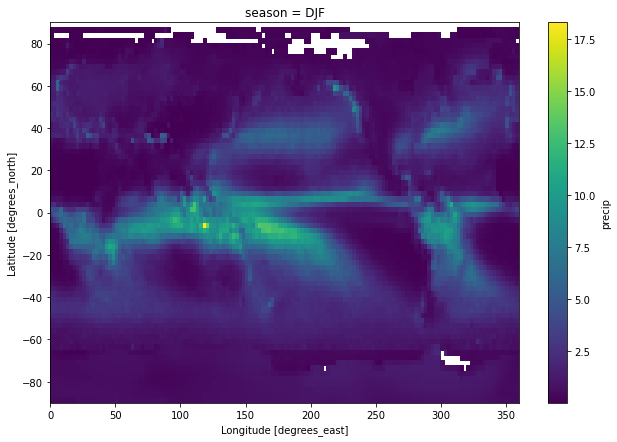

In [2]:
precip.groupby('time.season').mean(dim='time').sel(season='DJF').plot(size=7)

In [3]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/fx/atmos/fx/r0i0p0/latest/sftlf/sftlf_fx_ACCESS1-3_historical_r0i0p0.nc'
landfrac = xr.open_dataset(url).sftlf

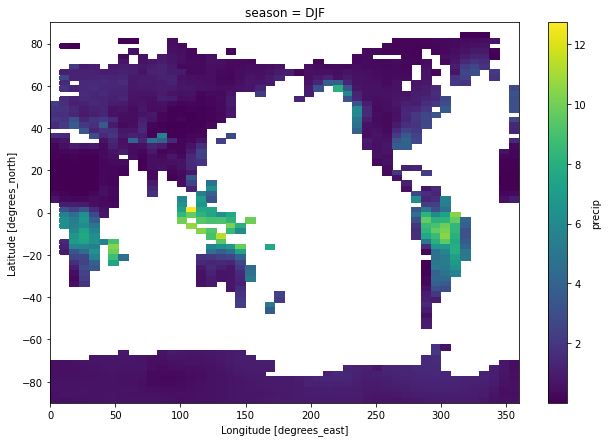

In [4]:
precip.where(landfrac>0).groupby('time.season').mean(dim='time').sel(season='DJF').plot(size=7)

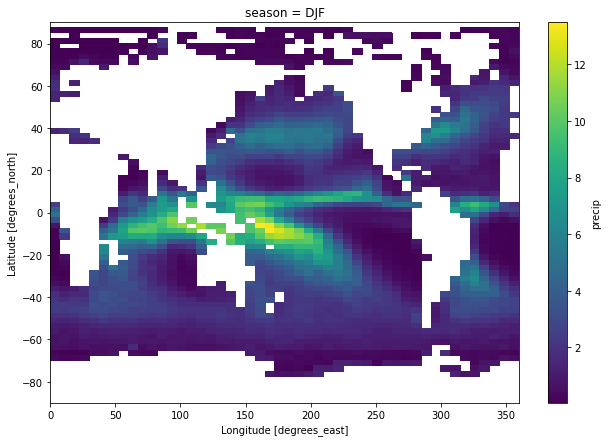

In [5]:
precip.where(landfrac==0).groupby('time.season').mean(dim='time').sel(season='DJF').plot(size=7)

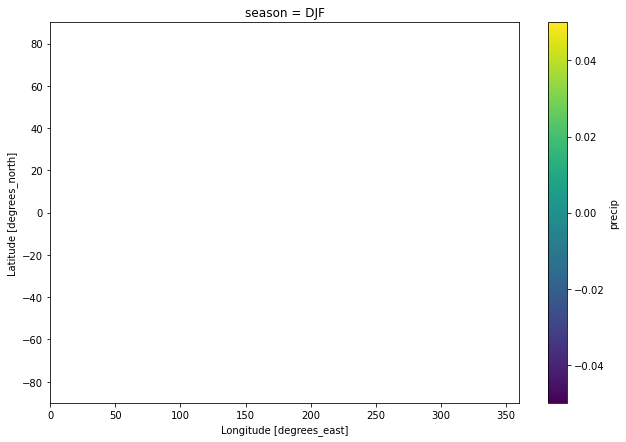

In [6]:
precip.where(landfrac<0).groupby('time.season').mean(dim='time').sel(season='DJF').plot(size=7)